In [1]:
# install pycaret
# !pip3 install --user pycaret
# import sys
# !{sys.executable} -m pip install pycaret
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from pycaret.classification import *
import numpy as np

In [33]:
df_1_2 = pd.read_csv("./labeled-data/1st-2st-labeling/all-labeled-data.csv")
df_3 = pd.read_csv("./labeled-data/3st-labeling/all-labeled-data.csv")
data = pd.concat([df_1_2, df_3], ignore_index=True)

data = data.drop(columns=data.filter(regex="discharge.*").columns)
data = data.drop(columns=data.filter(regex=".*_count_nonzero").columns)
data = data.drop(columns=["original label"])

X = data.drop(columns=["final label"])
y = data["final label"]

# data = pd.read_csv("./input-data/input.csv")

# X = data.drop(columns=["label"])
# y = data["label"]

In [46]:
data.columns

Index(['ingot_mean', 'ingot_median', 'ingot_max', 'ingot_min', 'ingot_std',
       'ingot_var', 'ingot_sum', 'ingot_skew', 'ingot_kurt', 'ingot_mode',
       'ingot_ptp', 'ingot_iqr', 'ingot_sem', 'mould_mean', 'mould_median',
       'mould_max', 'mould_min', 'mould_std', 'mould_var', 'mould_sum',
       'mould_skew', 'mould_kurt', 'mould_mode', 'mould_ptp', 'mould_iqr',
       'mould_sem', 'oil_pressure_mean', 'oil_pressure_median',
       'oil_pressure_max', 'oil_pressure_min', 'oil_pressure_std',
       'oil_pressure_var', 'oil_pressure_sum', 'oil_pressure_skew',
       'oil_pressure_kurt', 'oil_pressure_mode', 'oil_pressure_ptp',
       'oil_pressure_iqr', 'oil_pressure_sem', 'bucket_mean', 'bucket_median',
       'bucket_max', 'bucket_min', 'bucket_std', 'bucket_var', 'bucket_sum',
       'bucket_skew', 'bucket_kurt', 'bucket_mode', 'bucket_ptp', 'bucket_iqr',
       'bucket_sem', 'final label'],
      dtype='object')

In [34]:
y.value_counts()

A    280
B    132
Name: final label, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [36]:
s = setup(data=data, target="final label", numeric_features=list(X.columns), fix_imbalance=True, 
          feature_selection=True, normalize=True)
# , numeric_features=list(X.drop(columns=["Timestamp"]).columns)

,Description,Value
0,session_id,440
1,Target,final label
2,Target Type,Binary
3,Label Encoded,"A: 0, B: 1"
4,Original Data,"(412, 53)"
5,Missing Values,True
6,Numeric Features,52
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9411,0.9806,0.9333,0.9010,0.9127,0.8688,0.8734,0.0880
lightgbm,Light Gradient Boosting Machine,0.9341,0.9759,0.9233,0.8841,0.8995,0.8507,0.8554,0.0480
rf,Random Forest Classifier,0.9307,0.9810,0.9233,0.8778,0.8957,0.8442,0.8493,0.1280
gbc,Gradient Boosting Classifier,0.9234,0.9782,0.9111,0.8707,0.8833,0.8267,0.8341,0.1360
ada,Ada Boost Classifier,0.9094,0.9273,0.8911,0.8433,0.8644,0.7967,0.7996,0.0670
knn,K Neighbors Classifier,0.8642,0.9065,0.8344,0.7789,0.7988,0.6976,0.7054,0.0110
dt,Decision Tree Classifier,0.8612,0.8516,0.8256,0.7715,0.7906,0.6875,0.6949,0.0080
lr,Logistic Regression,0.8571,0.9073,0.8011,0.7940,0.7810,0.6764,0.6922,0.0110
ridge,Ridge Classifier,0.8500,0.0000,0.8233,0.7630,0.7803,0.6682,0.6816,0.0070
lda,Linear Discriminant Analysis,0.8468,0.8681,0.7811,0.7653,0.7632,0.6512,0.6608,0.0090


In [38]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=440, verbose=0,
                     warm_start=False)

In [39]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

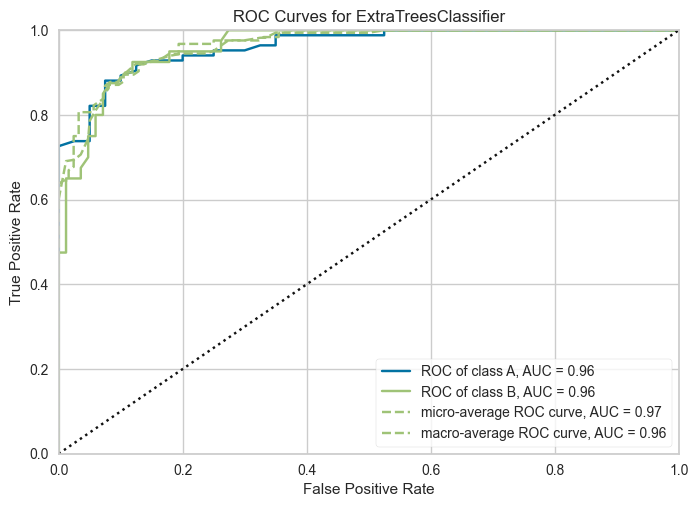

In [59]:
plot_model(best)

In [40]:
predictions = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8952,0.9619,0.8000,0.8649,0.8312,0.7553,0.7565


In [42]:
predictions.to_csv("et_predictions.csv", index=False)

In [43]:
save_model(best, 'best_model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['ingot_mean',
                                                           'ingot_median',
                                                           'ingot_max',
                                                           'ingot_min',
                                                           'ingot_std',
                                                           'ingot_var',
                                                           'ingot_sum',
                                                           'ingot_skew',
                                                           'ingot_kurt',
                              

In [52]:
model = load_model('./models/20221027/best_model_et')

Transformation Pipeline and Model Successfully Loaded


In [57]:
from lime.lime_tabular import LimeTabularExplainer
import random
import numpy as np

In [66]:
def map_f(x):
    if x == "A":
        return 0
    return 1

In [72]:
model.predict_proba(pd.DataFrame(X_test.iloc[0]))

KeyError: "None of [Index(['ingot_mean', 'ingot_median', 'ingot_max', 'ingot_min', 'ingot_std',\n       'ingot_var', 'ingot_sum', 'ingot_skew', 'ingot_kurt', 'ingot_mode',\n       'ingot_ptp', 'ingot_iqr', 'ingot_sem', 'mould_mean', 'mould_median',\n       'mould_max', 'mould_min', 'mould_std', 'mould_var', 'mould_sum',\n       'mould_skew', 'mould_kurt', 'mould_mode', 'mould_ptp', 'mould_iqr',\n       'mould_sem', 'oil_pressure_mean', 'oil_pressure_median',\n       'oil_pressure_max', 'oil_pressure_min', 'oil_pressure_std',\n       'oil_pressure_var', 'oil_pressure_sum', 'oil_pressure_skew',\n       'oil_pressure_kurt', 'oil_pressure_mode', 'oil_pressure_ptp',\n       'oil_pressure_iqr', 'oil_pressure_sem', 'bucket_mean', 'bucket_median',\n       'bucket_max', 'bucket_min', 'bucket_std', 'bucket_var', 'bucket_sum',\n       'bucket_skew', 'bucket_kurt', 'bucket_mode', 'bucket_ptp', 'bucket_iqr',\n       'bucket_sem'],\n      dtype='object')] are in the [columns]"

In [70]:
# X_train_ = X_train.copy().reset_index(drop=True)
# X_test_ = X_test.copy().reset_index(drop=True)
train = pd.concat([X_train, y_train.map(map_f)], axis=1, ignore_index=True)
test = pd.concat([X_test, y_test.map(map_f)], axis=1, ignore_index=True)
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['A', 'B'])
i = random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba)
exp.show_in_notebook(show_table=True)
# exp.save_to_file("./models/20221026/exp-lgbm.html")

ValueError: Domain error in arguments.